<a href="https://colab.research.google.com/github/juDEcorous/ML-Clustering/blob/main/Core_KMeans_Find_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KMeans: Find K </br>
Jude Maico Jr

Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments.

1. Use KMeans to create various customer segments.
- Use an Elbow Plot of inertia.
- And a plot of Silhouette Scores.
- Choose a K based on the results.


# Imports

In [ ]:
# Normal Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing Imports
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# ML
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
path = '/content/drive/MyDrive/clustering data/cust_seg.csv'
df = pd.read_csv(path, index_col = 'Customer Id')

# Data Inspection

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3
2,1,47,1,26,100,4.582,8.218,0.0,12.8
3,2,33,2,10,57,6.111,5.802,1.0,20.9
4,3,29,2,4,19,0.681,0.516,0.0,6.3
5,4,47,1,31,253,9.308,8.908,0.0,7.2


- Needs to drop unwanted columns
- All columns are numerical, no need for HOE
- Card Debt and Other Debt needs to be understood more
- Missing values seen on Defaulted column: We cannot drop the rows as there are 19.36% difference. Since it is categorical we will put frequently use to fill the missing values.

In [ ]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# double checking the dataframe
df.sample(3)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
563,30,2,10,22,1.410,2.132,0.0,16.1
668,31,1,12,24,0.442,1.142,0.0,6.6
173,31,3,9,28,0.122,0.606,0.0,2.6


# Data Preprocessing

In [ ]:
# filling missing values on defaulted column with most frequent
scaler = StandardScaler()
freq_imputer = SimpleImputer(strategy = 'most_frequent')

defaulted_pipeline = make_pipeline(freq_imputer, scaler)
defaulted_tuple = (defaulted_pipeline, ['Defaulted'])

In [ ]:
# scaling other columns 
columns_df =  df.drop(columns = 'Defaulted')
columns = list(columns_df.columns)

columns_scaler = StandardScaler()

columns_tuple = (columns_scaler, columns)

In [ ]:
# preprocessor
preprocessor = make_column_transformer(defaulted_tuple, columns_tuple, remainder = 'drop')

# Fit and Transform

In [ ]:
preprocess_df = preprocessor.fit_transform(df)
preprocess_df

array([[-0.52379654,  0.74291541,  0.31212243, ..., -0.68381116,
        -0.59048916, -0.57652509],
       [-0.52379654,  1.48949049, -0.76634938, ...,  1.41447366,
         1.51296181,  0.39138677],
       [ 1.90913822, -0.25251804,  0.31212243, ...,  2.13414111,
         0.80170393,  1.59755385],
       ...,
       [ 1.90913822, -1.24795149,  2.46906604, ...,  0.5766659 ,
         0.03863257,  3.45892281],
       [-0.52379654, -0.37694723, -0.76634938, ..., -0.68757659,
        -0.70147601, -1.08281745],
       [-0.52379654,  2.1116364 , -0.76634938, ...,  0.13611081,
         0.16463355, -0.2340332 ]])

## Inertia

Text(0, 0.5, 'inertia')

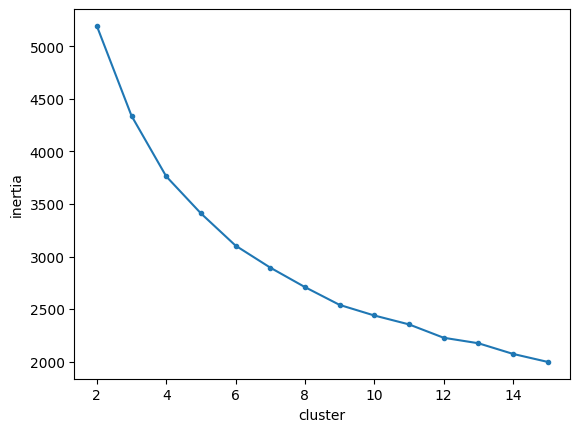

In [ ]:
# empty list of inertias
inertia = []

# loop through k-values and store inertias on the list.
for i in range(2, 16):
  kmeans = KMeans(n_clusters = i, n_init = 10, random_state = 42) 
  # FutureWarning: The default value of `n_init` will change from 10 to 'auto'
  kmeans.fit(preprocess_df)
  inertia.append(kmeans.inertia_)

# visualise
plt.plot(range(2, 16), inertia, marker = '.')
plt.xlabel('cluster')
plt.ylabel('inertia')

Elbow of Inertia is seen on cluster of 2.</br>
Cluster of 3 is also arguable but the 2 has more dramatic bend.

## Silhouette Score

,clusters,silhouette_score
0,2,0.340117
1,3,0.287387
2,4,0.253074
3,5,0.249648
4,6,0.243115
5,7,0.218830
11,13,0.207369
9,11,0.206149
10,12,0.205324
6,8,0.204773


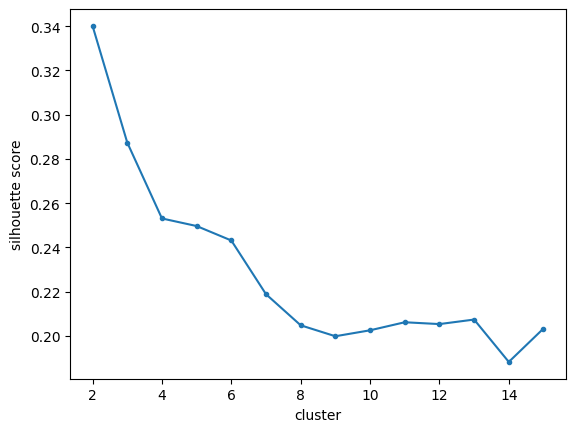

In [ ]:
# list for silhoette Score
silhouette_scores = []

for k in range(2, 16):
  kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
  kmeans.fit(preprocess_df)
  silhouette_scores.append(silhouette_score(preprocess_df, kmeans.labels_))

# visualize silhouette_scores
plt.plot(range(2, 16), silhouette_scores,  marker = '.')
plt.xlabel('cluster')
plt.ylabel('silhouette score')

#df for the score
silhouette_df = pd.DataFrame()
silhouette_df['clusters'] = range(2, 16)
silhouette_df['silhouette_score'] = silhouette_scores
silhouette_df.sort_values(by = 'silhouette_score', ascending = False)

## K Base
Witht the graph shown above, I will chose my cluster of 2 as my KBase. As it was one of my options while looking at the elbow in internia and the shilhoette score shows that it has the highest score which indicates that it should be the one to be used.